In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [33]:
(x_train,_),(_,_)=mnist.load_data()
#normalization
x_train=x_train/255.0
#reshape
x_train=x_train.reshape(-1,28*28)

In [34]:
#build_generator
def build_generator():
  model=keras.Sequential([Dense(128,activation='relu',input_shape=(100,)),Dense(784,activation='sigmoid')
  ])
  return model

In [35]:
#build_discriminator
def build_discriminator():
  model=keras.Sequential([Dense(128,activation='relu',input_shape=(784,)),Dense(1,activation='sigmoid')
  ])
  return model

In [36]:
generator=build_generator()
discriminator=build_discriminator()

discriminator.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
discriminator.trainable=False
gan_input=Input(shape=(100,))
generated_image=generator(gan_input)
gan_output=discriminator(generated_image)
gan=keras.Model(gan_input,gan_output)
gan.compile(optimizer='adam',loss='binary_crossentropy')

In [38]:
def train_gan(epochs,batch_size):
  for epoch in range(epochs):
    #Train the discriminator
    noise=np.random.normal(0,1,(batch_size,100))
    generated_images=generator.predict(noise)

    real_images=x_train[np.random.randint(0,x_train.shape[0],batch_size)]

    labels_real=np.ones((batch_size,1))
    labels_fake=np.zeros((batch_size,1))

    d_loss_real=discriminator.train_on_batch(real_images,labels_real)
    d_loss_fake=discriminator.train_on_batch(generated_images,labels_fake)

    #Train the generator
    noise=np.random.normal(0,1,(batch_size,100))
    labels=np.ones((batch_size,1))
    g_loss=gan.train_on_batch(noise,labels)

    #print the progress
    print(f"Epochs {epoch + 1}/{epochs} [D loss: {d_loss_real[0]:.4f},acc.:{d_loss_real[1]*100:.2f}%] [G loss: {g_loss:.4f}]")

In [49]:
def plot_generated_images(generator,epochs,examples=10,dim=(1,10),figsize=(10,1)):
  noise=np.random.normal(0,1,(examples,100))
  generated_images=generator.predict(noise)
  generated_images=generated_images.reshape(examples,28,28)

  plt.figure(figsize=figsize)
  for i in range(examples):
    plt.subplot(dim[0],dim[1],i+1)
    plt.imshow(generated_images[i],cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [50]:
train_gan(epochs=10,batch_size=32)

1/1 [==============================] - 0s 15ms/step
Epochs 1/10 [D loss: 0.0390,acc.:100.00%] [G loss: 4.6782]
1/1 [==============================] - 0s 15ms/step
Epochs 2/10 [D loss: 0.0381,acc.:100.00%] [G loss: 4.7725]
1/1 [==============================] - 0s 17ms/step
Epochs 3/10 [D loss: 0.0302,acc.:100.00%] [G loss: 4.6867]
1/1 [==============================] - 0s 15ms/step
Epochs 4/10 [D loss: 0.0674,acc.:100.00%] [G loss: 4.7233]
1/1 [==============================] - 0s 14ms/step
Epochs 5/10 [D loss: 0.0386,acc.:100.00%] [G loss: 4.3576]
1/1 [==============================] - 0s 15ms/step
Epochs 6/10 [D loss: 0.0669,acc.:96.88%] [G loss: 4.8538]
1/1 [==============================] - 0s 14ms/step
Epochs 7/10 [D loss: 0.0584,acc.:96.88%] [G loss: 4.7768]
1/1 [==============================] - 0s 14ms/step
Epochs 8/10 [D loss: 0.0433,acc.:100.00%] [G loss: 4.5608]
1/1 [==============================] - 0s 17ms/step
Epochs 9/10 [D loss: 0.0282,acc.:100.00%] [G loss: 4.4696]
1/1

1/1 [==============================] - 0s 17ms/step


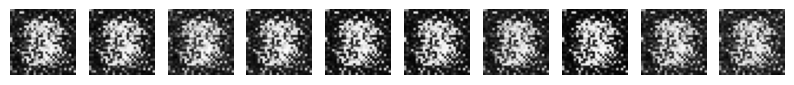

In [51]:
#Newly created output
plot_generated_images(generator,epochs=10)